<a href="https://colab.research.google.com/github/Gabriel-Groehs/Deep-Learning/blob/master/gabriel_groehs_cnn_convolucionais_projeto_7_classifica_o_de_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 7: Classificação de roupas

Projeto desenvolvido por Gabriel Groehs em acompanhamento do Curso Deep Learning com TensorFlow e Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

# Etapa 2: Carregamento da base de dados

In [ ]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Arquivos de base de dados/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Arquivos de base de dados/fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

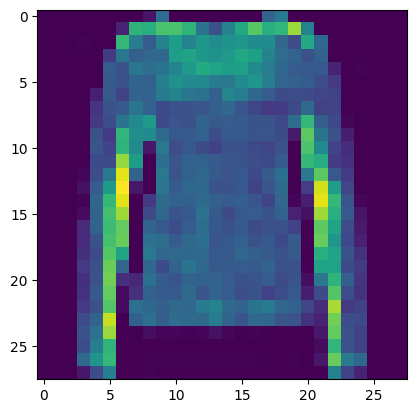

In [ ]:
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape((28,28)))
#plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

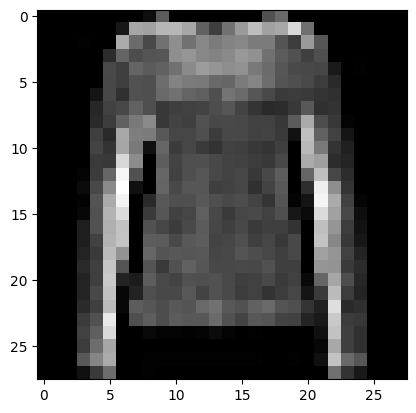

In [ ]:
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
label = training[i,0]
label

2.0

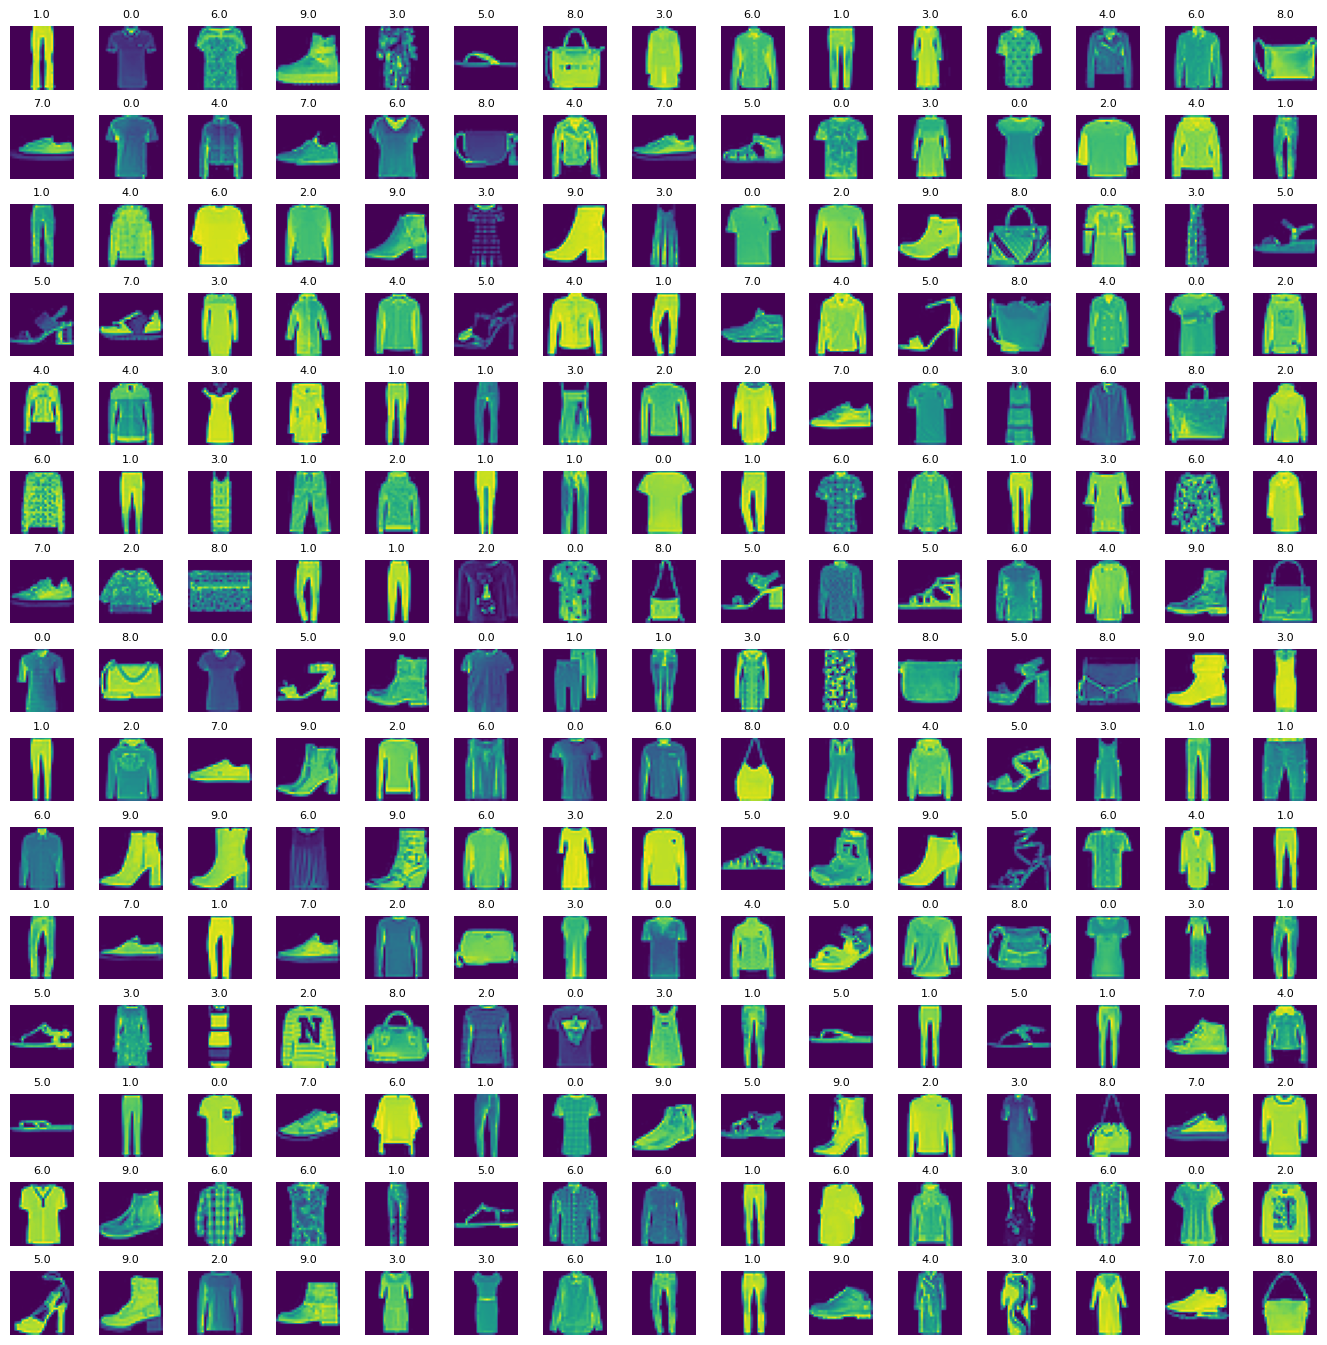

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [ ]:
X_train = training[:,1:] / 255
y_train = training[:,0]

In [ ]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 14s 11ms/step - loss: 0.8915 - accuracy: 0.6859
Epoch 2/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4997 - accuracy: 0.8150
Epoch 3/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4277 - accuracy: 0.8455
Epoch 4/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3848 - accuracy: 0.8631
Epoch 5/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3551 - accuracy: 0.8735
Epoch 6/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3310 - accuracy: 0.8812
Epoch 7/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3158 - accuracy: 0.8858
Epoch 8/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3058 - accuracy: 0.8896
Epoch 9/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2919 - accuracy: 0.8933
Epoch 10/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2822 - ac

# Etapa 6: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8223 - accuracy: 0.9174


In [ ]:
evaluation

[0.8223252892494202, 0.9174000024795532]

In [ ]:
#predicted_classes = cnn.predict_classes(X_test) -- Atualizado: 17/01/22

SyntaxError: ignored

In [ ]:
predict_x=cnn.predict(X_test)
predicted_classes=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

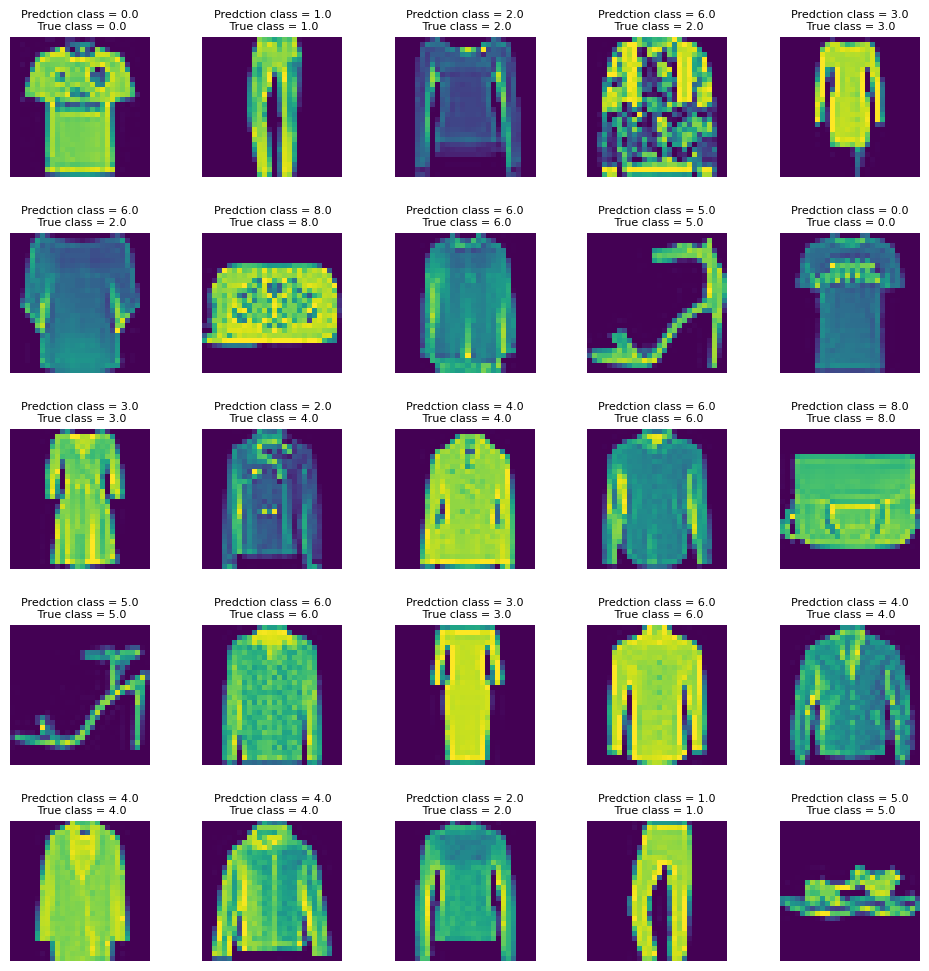

In [ ]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

<Axes: >

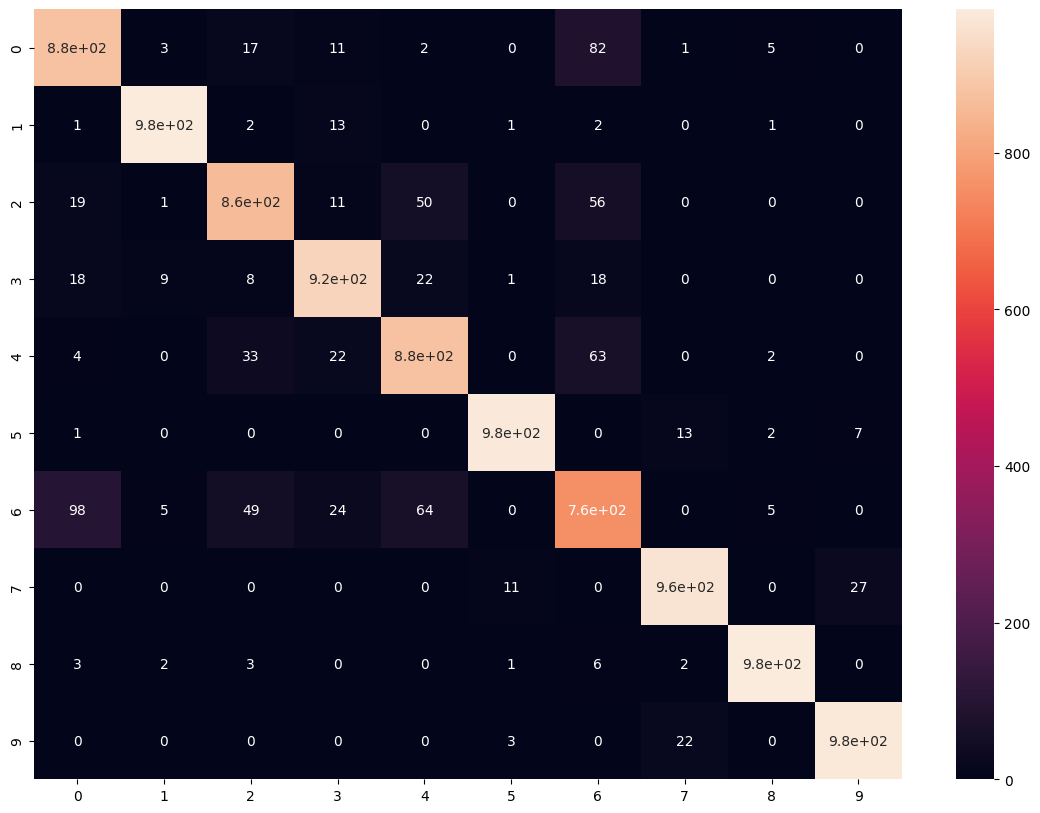

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[879,   3,  17,  11,   2,   0,  82,   1,   5,   0],
       [  1, 980,   2,  13,   0,   1,   2,   0,   1,   0],
       [ 19,   1, 863,  11,  50,   0,  56,   0,   0,   0],
       [ 18,   9,   8, 924,  22,   1,  18,   0,   0,   0],
       [  4,   0,  33,  22, 876,   0,  63,   0,   2,   0],
       [  1,   0,   0,   0,   0, 977,   0,  13,   2,   7],
       [ 98,   5,  49,  24,  64,   0, 755,   0,   5,   0],
       [  0,   0,   0,   0,   0,  11,   0, 962,   0,  27],
       [  3,   2,   3,   0,   0,   1,   6,   2, 983,   0],
       [  0,   0,   0,   0,   0,   3,   0,  22,   0, 975]])

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [ ]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.88      0.87      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.86      0.88      0.87      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.77      0.76      0.76      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

